In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
adf = pd.read_csv('anime_data.csv')
pd.set_option('display.max_columns', None)

In [8]:
adf.head(5)

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,0,Sousou no Frieren,28.0,Sep 2023 -,493571,9.13
1,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,3292928,9.09
2,2,Steins;Gate,24.0,Apr 2011 - Sep 2011,2526417,9.07
3,3,Gintama°,51.0,Apr 2015 - Mar 2016,620676,9.06
4,4,Shingeki no Kyojin Season 3 Part 2,10.0,Apr 2019 - Jul 2019,2227792,9.05


head моего датафрейма

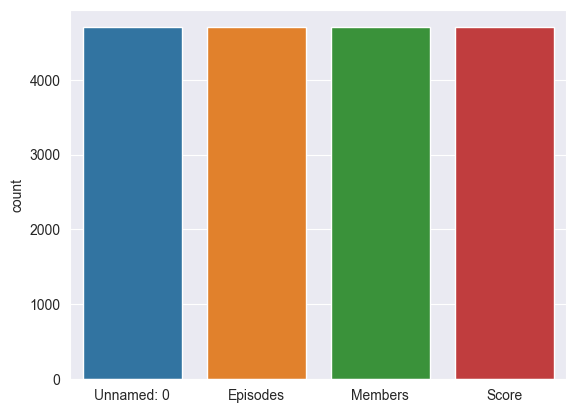

In [31]:
sns.countplot(data=adf)
plt.show()

Количество записей для каждого из столбцов

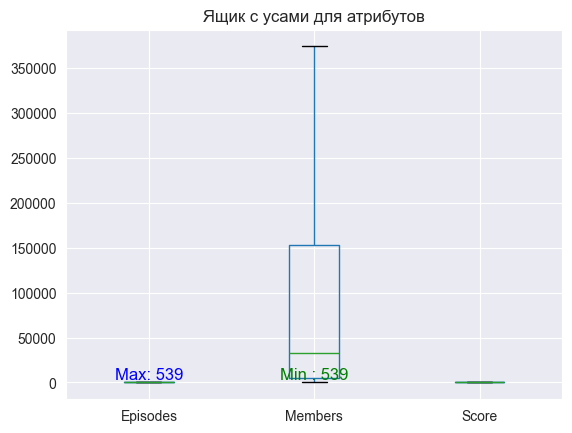

In [23]:
bp = adf.boxplot(column=['Episodes', 'Members', 'Score'], showfliers=False)
plt.title('Ящик с усами для атрибутов')


Q1 = adf['Members'].quantile(0.25)
Q3 = adf['Members'].quantile(0.75)
IQR = Q3 - Q1
medians = adf['Members'].median()
outliers_count = ((adf['Members'] < (Q1 - 1.5 * IQR)) | (adf['Members'] > (Q3 + 1.5 * IQR))).sum()
max_outliers = outliers_count.max()
min_outliers = outliers_count.min()

plt.text(1, max_outliers, f"Max: {max_outliers}", color='blue', fontsize=12, ha='center', va='bottom')
plt.text(2, min_outliers, f"Min : {min_outliers}", color='green', fontsize=12, ha='center', va='bottom')

plt.show()

Боксплот, а так же квантили для Members

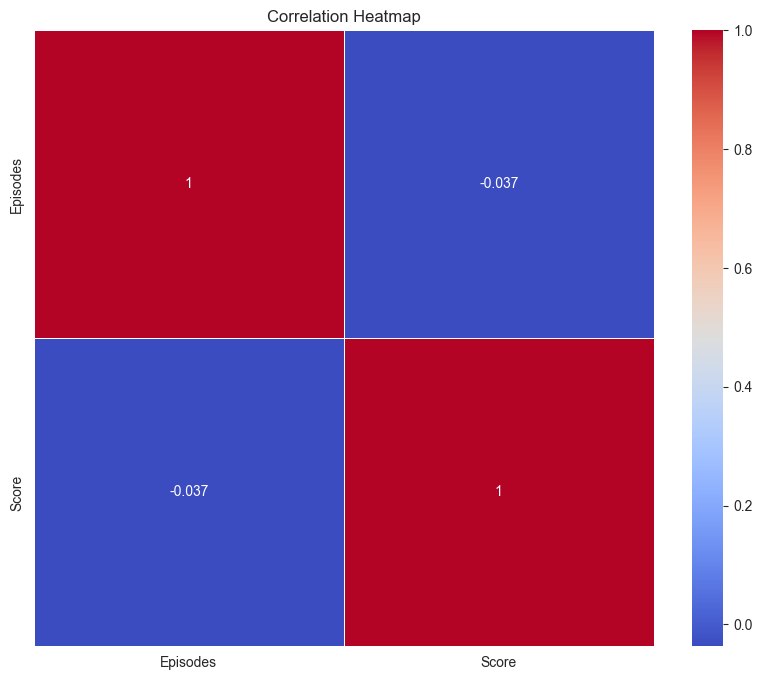

Наибольшая корреляция: Episodes и Episodes с коэффициентом 1.0
Вывод о наибольшей корреляции: ...
Наименьшая корреляция: Episodes и Score с коэффициентом -0.036734683763634514


In [29]:
plt.figure(figsize=(10, 8))
correlation_matrix = adf[['Episodes', 'Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


max_corr = correlation_matrix.stack().idxmax()
max_corr_value = correlation_matrix.loc[max_corr[0], max_corr[1]]
print(f"Наибольшая корреляция: {max_corr[0]} и {max_corr[1]} с коэффициентом {max_corr_value}")
print("Вывод о наибольшей корреляции: ...")


min_corr = correlation_matrix.stack().idxmin()
min_corr_value = correlation_matrix.loc[min_corr[0], min_corr[1]]
print(f"Наименьшая корреляция: {min_corr[0]} и {min_corr[1]} с коэффициентом {min_corr_value}")

Корреляция на тепловой карте между Score и Episodes

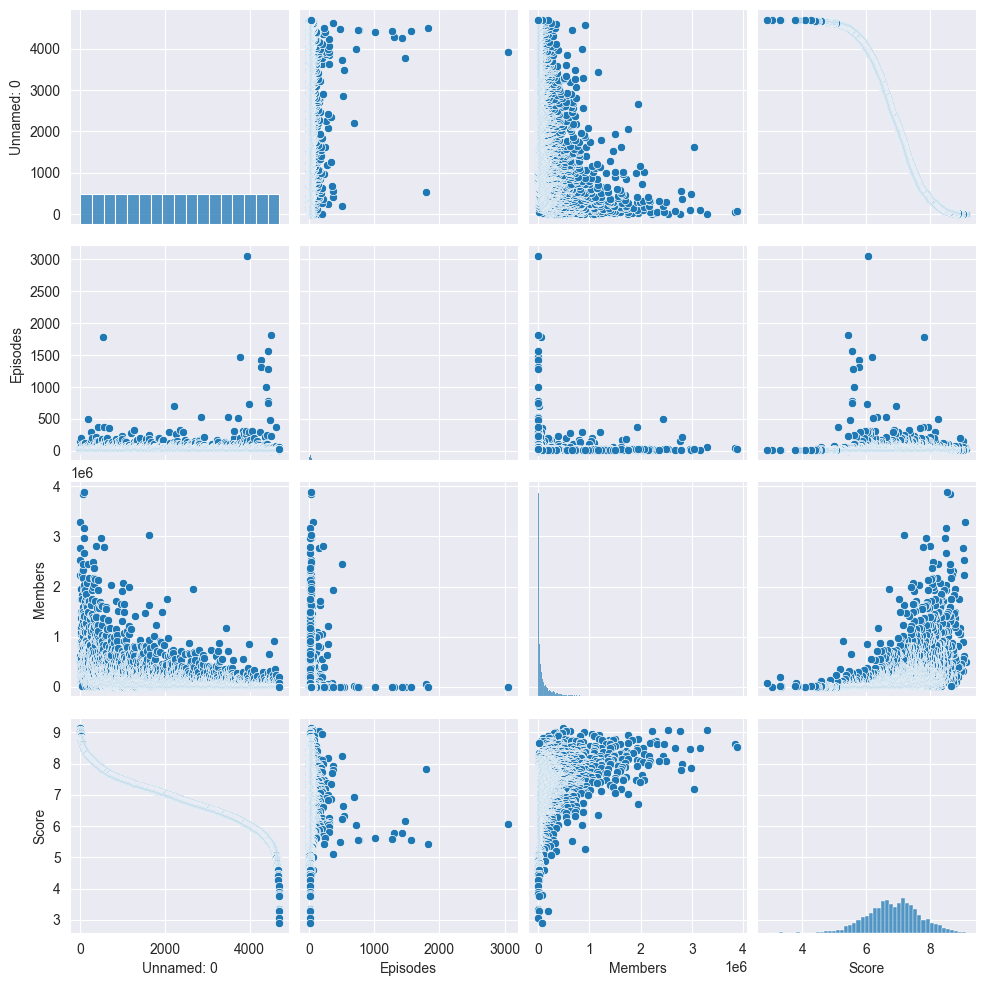

In [30]:
sns.pairplot(adf)
plt.show()

Показание корреляции между Score Episdes и Members